# (What Features could affect whether a loan is completed or not?)
## by (Rehab Emam)

## Investigation Overview

> ***LoanStatus whether it's completed or not is my dependant variable to explore, exploring various numeric and categorical variables to reach best features affecting loan completion.***
> * Does the interest rate affect loan status?
> * Is Loan amount stated a good feature to complete a loan?
> * What kind of reasons people state for asking a loan?
> * Does Income play a good role in completing a loan?
> * Is the monthly paid amount for a loan a good variable to rely on in investigation?

## Dataset Overview

> * The dataset is Loan data by Prosper, has 113937 entries with 81 features columns.
> * Variables are of different dtypes: bool(3), float64(50), int64(11), object(17)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Listing Categories)

### What kind of listings that people mostly ask loans for? would be a good point to target them.

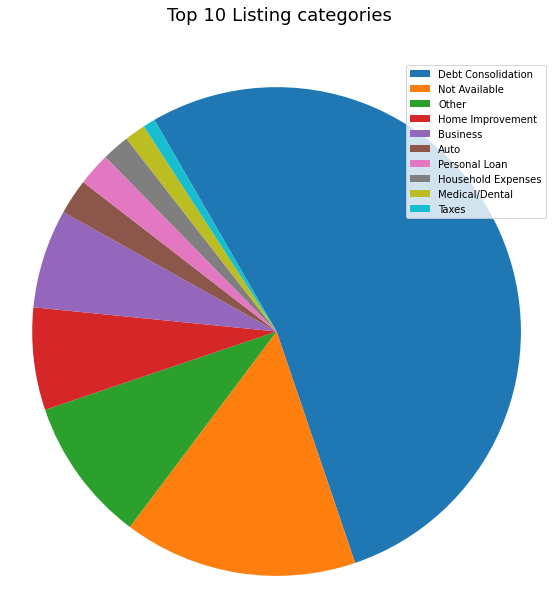

In [14]:
# First I replaced numbers of numeric categories to see better differen loan borrower's reasons
df.replace({'ListingCategory (numeric)':{0:'Not Available', 1:'Debt Consolidation', 2:'Home Improvement', 3:'Business', 4:'Personal Loan', 5:'Student Use',
            6:'Auto', 7:'Other', 8:'Baby&Adoption', 9:'Boat', 10:'Cosmetic Procedure', 11:'Engagement Ring',
            12:'Green Loans', 13:'Household Expenses', 14:'Large Purchases', 15:'Medical/Dental', 16:'Motorcycle', 17:'RV', 18:'Taxes',
            19:'Vacation', 20:'Wedding Loans'}}, inplace=True)
        
plt.figure(figsize=[10,10])
patches, texts = plt.pie(df['ListingCategory (numeric)'].value_counts().nlargest(10), counterclock=False, startangle=120, rotatelabels=True);
plt.axis('square');
labels = df['ListingCategory (numeric)'].value_counts().nlargest(10).index
#plt.legend()
#patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="upper right")
plt.title('Top 10 Listing categories',loc='center', pad=40, fontsize=18);

## (Interest Rate Effect on Loan Status)

### Dividing the dataset to 3 subsets: Completed loans, late payments and Problematic payments.

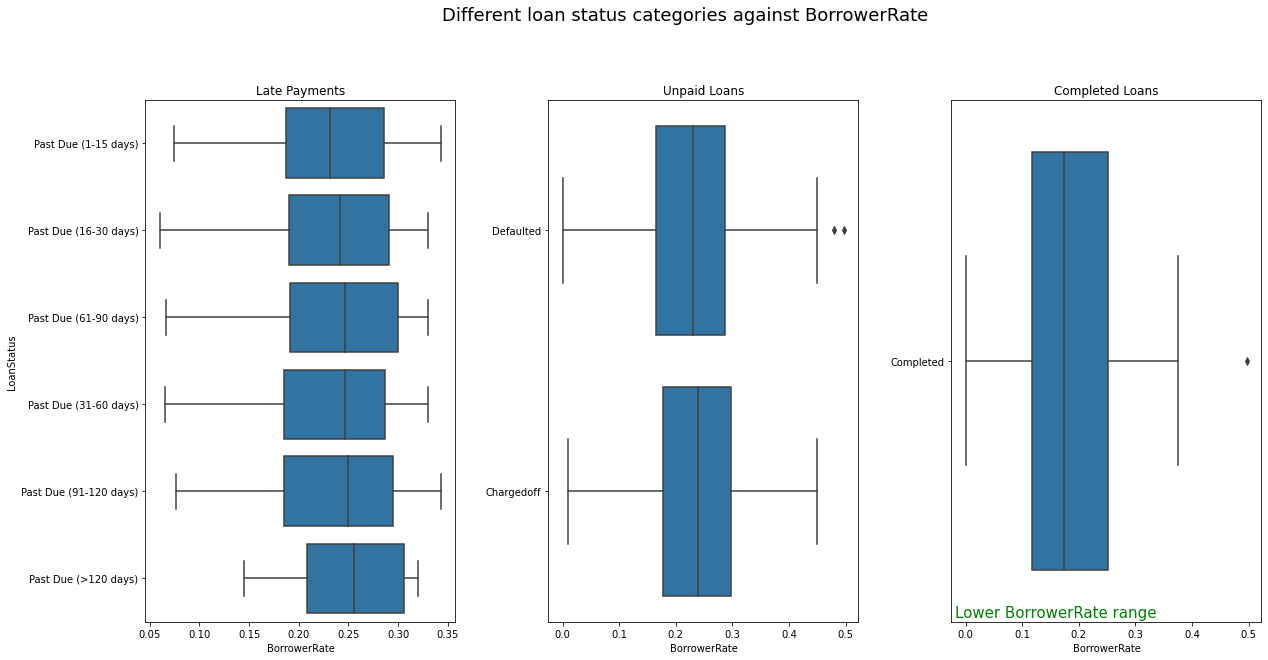

In [15]:
# Seperate the data to 3 subsets, based on LoanStatus
df_completed = df[df['LoanStatus'] == 'Completed']
#df_not_completed = df[df['LoanStatus'] != 'Completed']
df_late = df.loc[df['LoanStatus'].isin(['Past Due (1-15 days)', 'Past Due (16-30 days)', 
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'Past Due (>120 days)'])]
df_problematic = df.loc[df['LoanStatus'].isin(['Defaulted','Chargedoff'])]
base_color = sb.color_palette()[0]

fig = plt.figure(figsize=[20,10])
ax = plt.gca()
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = plt.subplot(1,3,1)
sb.boxplot(data=df_late, y='LoanStatus', x='BorrowerRate', color=base_color);
ax1.set_title('Late Payments');

ax2 = plt.subplot(1,3,2)
sb.boxplot(data=df_problematic, y='LoanStatus', x='BorrowerRate', color=base_color);
plt.ylabel("");
ax2.set_title('Unpaid Loans');

ax3 = plt.subplot(1,3,3)
sb.boxplot(data=df_completed, y='LoanStatus', x='BorrowerRate', color=base_color);
plt.ylabel("");
ax3.set_title('Completed Loans')
ax3.text(0.01, 0.01, 'Lower BorrowerRate range',
        transform=ax3.transAxes,
        color='green', fontsize=15)

fig.suptitle("Different loan status categories against BorrowerRate", fontsize=18);



## (Real Total Loan Amount, does it affect loan status?)

### Real Loan Amount Paid includes interests, fees and late payments.

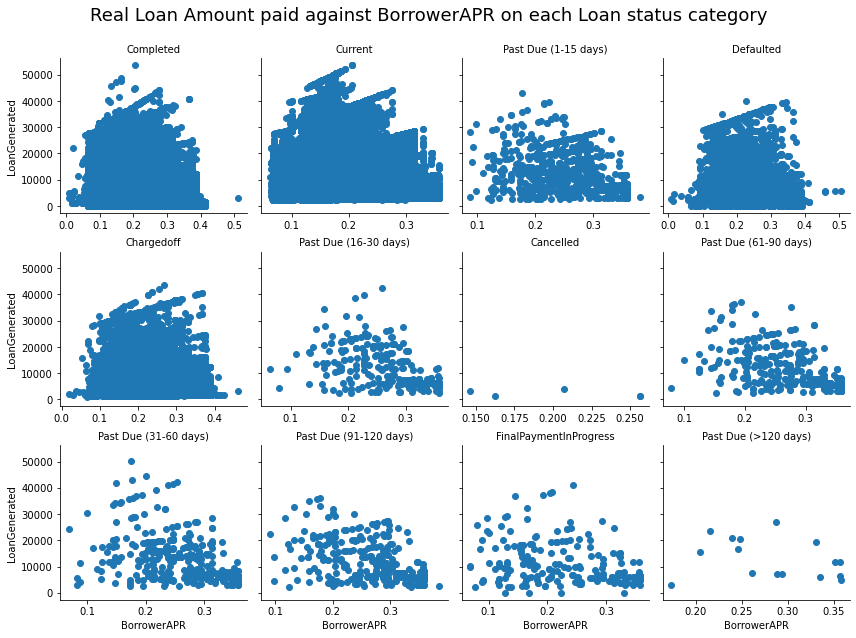

In [18]:
# Generate a new variable by multiplying Term by MonthlyLoanPayment features to get the total loan amount paid after Term in months
df['LoanGenerated'] = df['Term'] * df['MonthlyLoanPayment']
g = sb.FacetGrid(data=df, col='LoanStatus', margin_titles=True, height=3, col_wrap=4, sharex=False, sharey=True);
g.map(plt.scatter, 'BorrowerAPR','LoanGenerated');
g.set_titles('{col_name}');
fig = plt.gcf();
g.fig.suptitle("Real Loan Amount paid against BorrowerAPR on each Loan status category", fontsize=18 );
g.fig.subplots_adjust(top=.9);

## (Income range plotted against Real loan amounts, does it affect loan status?)

### Real Loan Amount Paid includes interests, fees and late payments.

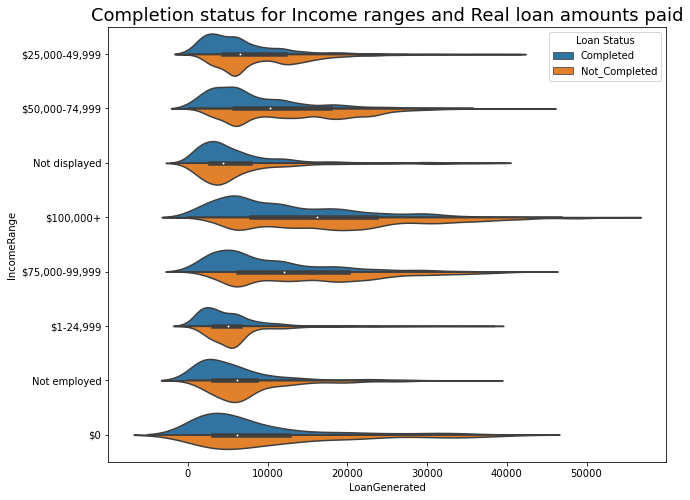

In [6]:
# Create a new column to get loan status whether completed or not_completed
df['Loan Status'] = np.where(df['LoanStatus'].str.contains('Completed'), 'Completed', 'Not_Completed')
plt.figure(figsize=[10,8]);
sb.violinplot(y ='IncomeRange', x ='LoanGenerated', data = df, hue ='Loan Status', split = True);
plt.title('Completion status for Income ranges and Real loan amounts paid', fontsize=18);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!